# Final Project : Step by Step
### EAI 6080 
#### Fall 2021
#### Shaohan Chen, Xin Xin Han and Yin Jiang

Welcome! In this research, two logistic regression models and a convolutional neural network (CNN) model will be implemented. 

The first logistic model is built using Scikit-Learn package, whereas the second regression model is built from scratch using TensorFlow package. There is a convergence warning when the first model was trained, hence, a logistic model was then built to solve this problem. The last model is a CNN model created from TensorFlow’s Keras package. 

MNIST, a standard data used in computer vision and deep learning to solve handwritten digit classification problem will be used as the basis to train and evaluate the performance of the models. The goal of this project is to classify the images into their classes accurately. 

# Packages
We will start with importing all the required packages to complete this project.

In [1]:
#Import Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.python.ops.numpy_ops import np_config
from __future__ import absolute_import, division, print_function
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# MNIST Dataset

MNIST is an acronym that stands for the Modified National Institute of Standards and Technology. 

Note that each of the image is a handwritten single digit between 0 to 9. The images will be classified into one of the classes that represents integer values from 0 to 9.

The following code will help us load the MNIST dataset using Keras API.

In [2]:
# Import the MNIST dataset
from keras.datasets import mnist
# Load dataset
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
# Shape of the train dataset
print('Train data size: \n X = %s, y = %s' 
      % (xtrain.shape, ytrain.shape))
# Shape of the test dataset
print('Test data size: \n X = %s, y = %s' 
      % (xtest.shape, ytest.shape))

Train data size: 
 X = (60000, 28, 28), y = (60000,)
Test data size: 
 X = (10000, 28, 28), y = (10000,)


From the above results, we know that the train dataset consists of 60,000 small squares (examples) of 28 x 28 pixel images whereas the test dataset contain 10,000 examples. The test data is 14.29% of the full data.

The codes below will be plotting the first nine images of the train dataset. We can see that the images are all grayscale.

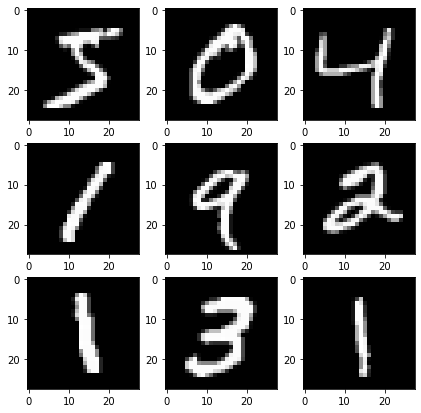

In [3]:
# Set the figure size
plt.figure(figsize=(7,7))
# Plot the first nine images
for i in range(9):
    # Defining the subplot
    pyplot.subplot(330 + 1 + i)
    # Plot raw pixel data
    pyplot.imshow(xtrain[i], cmap = pyplot.get_cmap('gray'))
# Show images
pyplot.show()

As the required cleaned data for each model is slightly difference. Hence, the data pre-processing will be completed within each model.


# Model A: Logistic Regression (Scikit-learn)

### Data Pre-Processing
Below is a pre-processing function clean the image into a format that can be read by the model directly. To load the data into the Scikit-Learn Logistic Regression mode, the images need to be normalize, then resize the two dimensional image into a one dimensional array.

#### 1. Normalize the image
Start by checking the range of pixel for the images.

In [4]:
# confirm pixel range is 0-255 for train data
print('Train Data Type: %s' % xtrain.dtype)
print('Min: %.3f, Max: %.3f' % (xtrain.min(), xtrain.max()))
# confirm pixel range is 0-255 for test data
print('Test Data Type: %s' % xtest.dtype)
print('Min: %.3f, Max: %.3f' % (xtest.min(), xtest.max()))

Train Data Type: uint8
Min: 0.000, Max: 255.000
Test Data Type: uint8
Min: 0.000, Max: 255.000


The above results states that the pixels are currently between 0 to 255. The next step is to normalize the data by dividing the values by 255. The revised dataset will be renamed to include '_A'.

In [5]:
# Normalize the Independent Variables
xtrain_A = xtrain / 255.0
xtest_A = xtest / 255.0

After normalizing the data, we will check the range again to confirm they are values between 0 to 1.

In [6]:
# confirm pixel range is 0-1 for train data
print('Train Data Type: %s' % xtrain_A.dtype)
print('Min: %.3f, Max: %.3f' % (xtrain_A.min(), xtrain_A.max()))
# confirm pixel range is 0-1 for test data
print('Test Data Type: %s' % xtest_A.dtype)
print('Min: %.3f, Max: %.3f' % (xtest_A.min(), xtest_A.max()))

Train Data Type: float64
Min: 0.000, Max: 1.000
Test Data Type: float64
Min: 0.000, Max: 1.000


#### 2. Create a one dimension array
The original image size of 28 x 28 will be converted to a array with 784 input values.

In [7]:
# Flatten to a 1D array
xtrain_A = tf.reshape(xtrain_A, [-1, 784])
xtest_A = tf.reshape(xtest_A, [-1, 784])
ytrain_A = ytrain
ytest_A = ytest
# Shape of the dataset
print('Train data size: \n X=%s, y=%s' % (xtrain_A.shape, ytrain_A.shape))
print('Test data size: \n X=%s, y=%s' % (xtest_A.shape, ytest_A.shape))

Train data size: 
 X=(60000, 784), y=(60000,)
Test data size: 
 X=(10000, 784), y=(10000,)


### Defining the Model

Since this is a multi-class problem, 'lbfgs' will be implemented as solver with the default maximum iteration (100).

Note that lbfgs is an acronym that stands for the Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm.

In [8]:
# Define Logistic Regression Model
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=100)

### Model Training
Since the model is defined, the next step is to train the model with the pre-processed training dataset.

In [9]:
#Logistic Regression Model Training
logisticRegr.fit(xtrain_A, ytrain_A)

C:\Users\ahan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

From the output results, the iteration has reached its limit (100). We had tried using 1,000 as max iteration. The time taken is much longer and there was still convergence warning message. We then further tried setting the max iteration to 10,000, however, the training time took too long and we ended cancelling the run.

We decided to continue checking the performance of model A even though there is a warning message. In addition, we had built a logistic regression (Model B) from scratch using TensorFlow package where there is no warning message.

### Performance of the Model A
The performance of the model will be check by running the test dataset on the built model. This section will be spilt into four parts:
   - Accuracy Score of Test Dataset
   - Confusion Matrix
   - Classification Report
   - Sample images with inaccurate prediction

#### 1. Accuracy of Model A
The test dataset will be loaded to check the performance of the model.

In [10]:
#Logistic Regression Predicting Results
predictionsA = logisticRegr.predict(xtest_A)

In [11]:
#Logistic Regression Testing Result
scoreA = logisticRegr.score(xtest_A, ytest_A)
print("Test Accuracy: %.2f" % (scoreA*100))

Test Accuracy: 92.58


#### 2. Confusion Matrix for Model A

In [12]:
# Set the figure size
fig = plt.figure(figsize = (9, 9))
#Confusion Matrix for Logistic Regression Model Testing
cm_A = confusion_matrix(ytest_A, predictionsA)
print(cm_A)

[[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4]
 [   4    1   18  917    1   22    4   11   25    7]
 [   1    1    7    3  914    0   10    4   10   32]
 [  10    2    3   34    7  783   14    6   29    4]
 [   9    3    8    2    7   14  912    2    1    0]
 [   1    8   24    5    7    1    0  950    3   29]
 [   9   11    8   23    7   25   12    7  861   11]
 [   9    8    0   11   24    6    0   19    7  925]]


<Figure size 648x648 with 0 Axes>

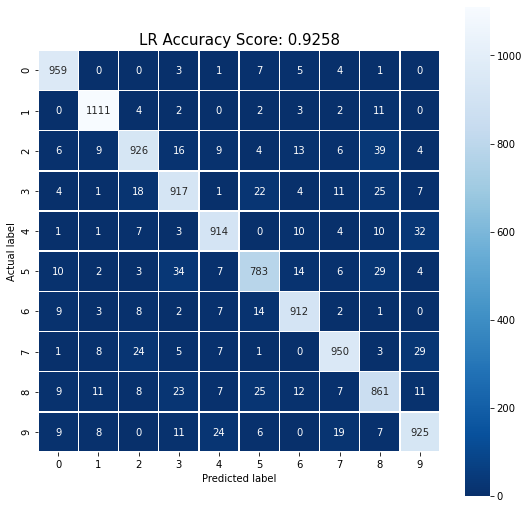

In [13]:
#Confusion Matrix Plot for Logistic Regression Model Testing
plt.figure(figsize=(9,9))
sns.heatmap(cm_A, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LR Accuracy Score: {0}'.format(scoreA)
plt.title(all_sample_title, size = 15);

#### 3. Classification Report for Model A

In [14]:
#Logistic Regression Classification Report for Each Digit
print(classification_report(ytest_A, predictionsA, digits = 4))

              precision    recall  f1-score   support

           0     0.9514    0.9786    0.9648       980
           1     0.9627    0.9789    0.9707      1135
           2     0.9279    0.8973    0.9123      1032
           3     0.9026    0.9079    0.9052      1010
           4     0.9355    0.9308    0.9331       982
           5     0.9062    0.8778    0.8918       892
           6     0.9373    0.9520    0.9446       958
           7     0.9397    0.9241    0.9318      1028
           8     0.8723    0.8840    0.8781       974
           9     0.9140    0.9167    0.9154      1009

    accuracy                         0.9258     10000
   macro avg     0.9250    0.9248    0.9248     10000
weighted avg     0.9257    0.9258    0.9257     10000



#### 4. Sample Images of Inaccurate Prediction

In [15]:
# Inspecting Misclassified Images of Logistic Regression Model Testing
indexA = 0
misclassifiedIndexesA = []
for label, predict in zip(ytest_A, predictionsA):
    if label != predict: 
        misclassifiedIndexesA.append(indexA)
    indexA +=1

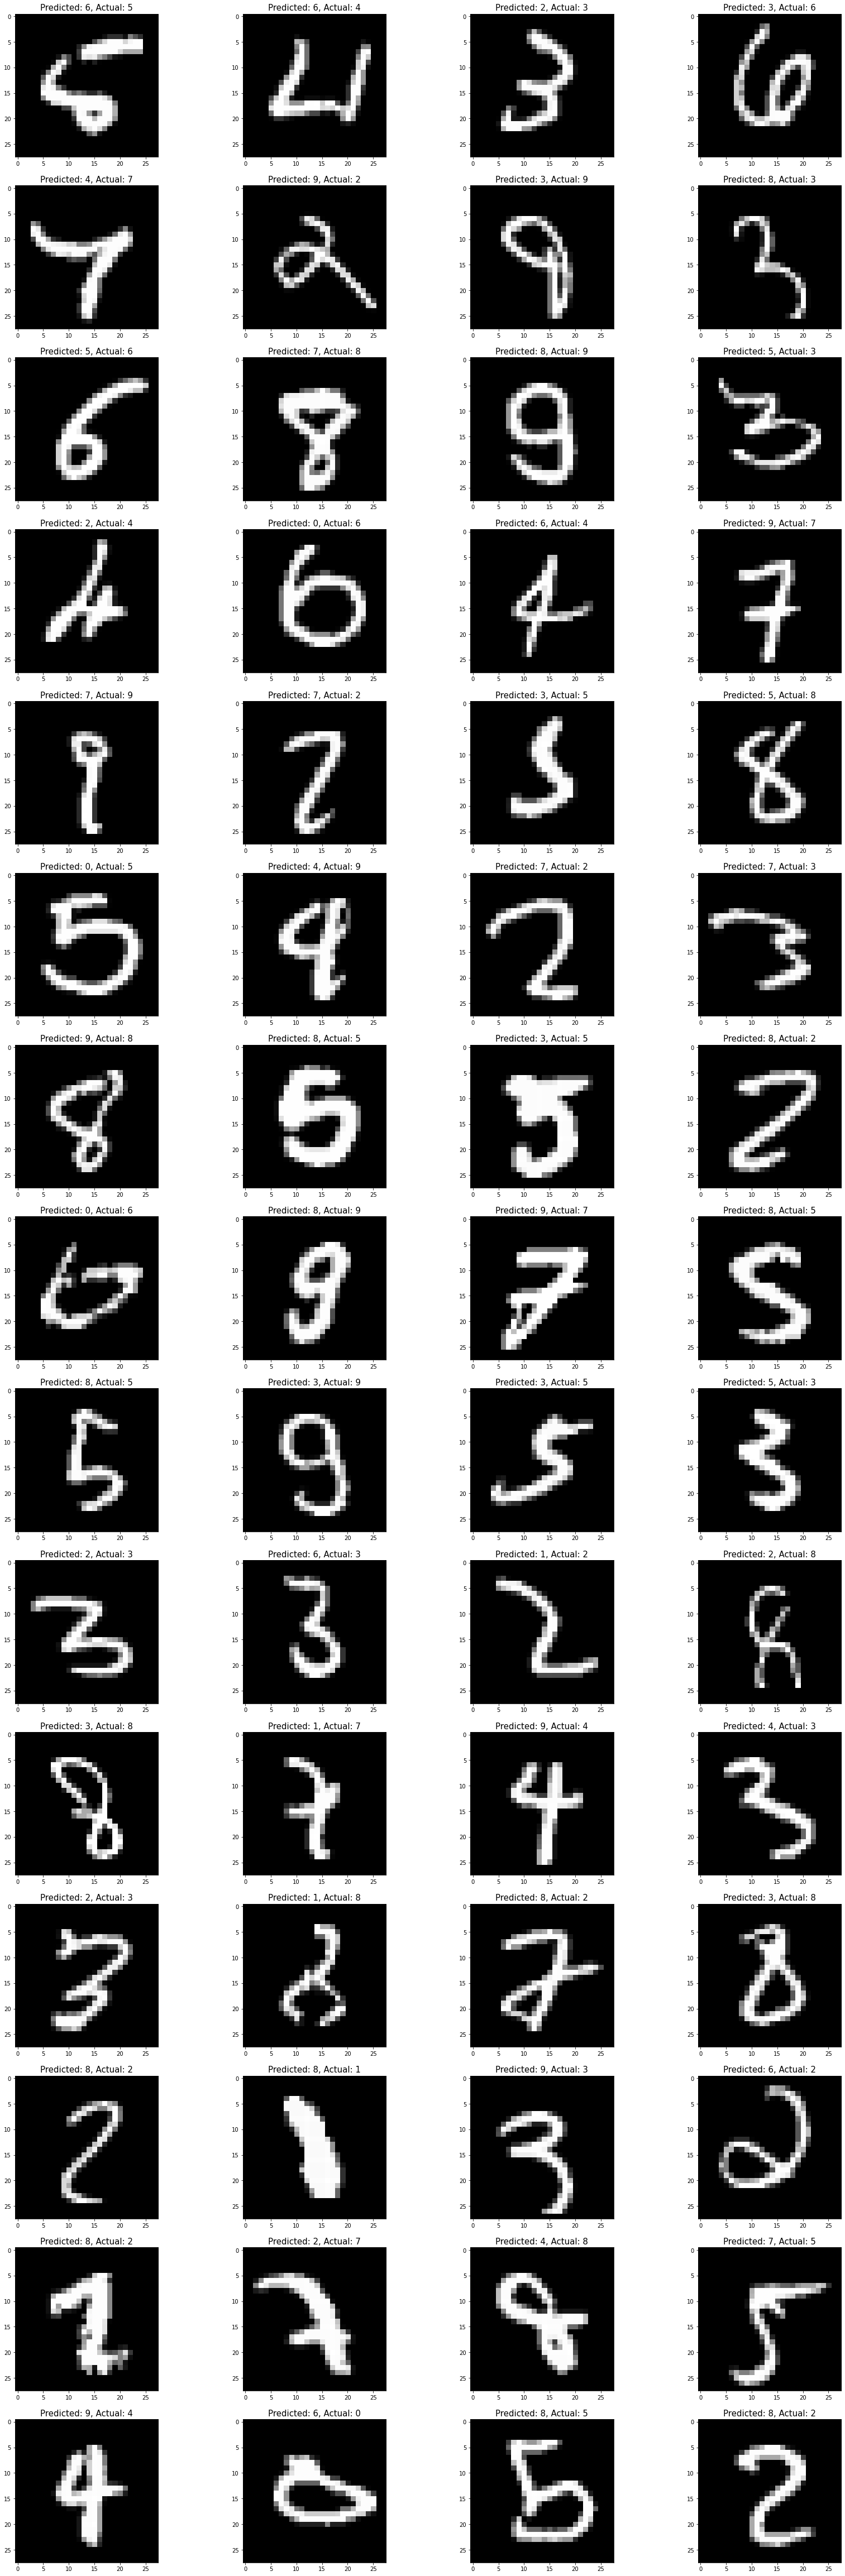

In [16]:
# Show the first 60 Images that are place in the wrong class
plt.figure(figsize=(28,84))
for plotIndex, badIndex in enumerate(misclassifiedIndexesA[0:60]):
    plt.subplot(15, 4, plotIndex + 1)
    plt.imshow(np.reshape(xtest_A[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictionsA[badIndex], ytest_A[badIndex]), fontsize = 15)

# Model B: Logistic Regression (TensorFlow)

### Data Pre-Processing
Below is a pre-processing function clean the image into a format that can be read by the model directly. 

The first two steps are same as the model A, which are normalizing the images and converting the images into a one dimension array. There are two extra steps required before running model B - change the data type and spilt train data into train and validation set.

#### 1. Normalize the image
In Model A, we had checked and confirmed that the original images contain values between 0 to 255. This we will directly divide by 255 over here and rename the dataset to include '_B'.

In [17]:
# Normalize the Independent Variables
xtrain_B = xtrain / 255.0
xtest_B = xtest / 255.0

After normalizing the data, we will check the range to confirm they are values between 0 to 1.

In [18]:
# confirm pixel range is 0-1 for train data
print('Train Data Type: %s' % xtrain_B.dtype)
print('Min: %.3f, Max: %.3f' % (xtrain_B.min(), xtrain_B.max()))
# confirm pixel range is 0-1 for test data
print('Test Data Type: %s' % xtest_B.dtype)
print('Min: %.3f, Max: %.3f' % (xtest_B.min(), xtest_B.max()))

Train Data Type: float64
Min: 0.000, Max: 1.000
Test Data Type: float64
Min: 0.000, Max: 1.000


#### 2. Create a one dimension array
The original image size of 28 x 28 will be converted to a array with 784 input values.

In [19]:
# Flatten to a 1D array
xtrain_B = tf.reshape(xtrain_B, [-1, 784])
xtest_B = tf.reshape(xtest_B, [-1, 784])
ytrain_B = ytrain
ytest_B = ytest
# Shape of the dataset
print('Train data size: \n X=%s, y=%s' % (xtrain_B.shape, ytrain_B.shape))
print('Test data size: \n X=%s, y=%s' % (xtest_B.shape, ytest_B.shape))

Train data size: 
 X=(60000, 784), y=(60000,)
Test data size: 
 X=(10000, 784), y=(10000,)


#### 3. Change data type
The data type of the images will be converted from float64 to float32.

In [20]:
xtrain_B = tf.cast(xtrain_B, tf.float32)
xtest_B = tf.cast(xtest_B, tf.float32)
xtrain_B.dtype, xtest_B.dtype

(tf.float32, tf.float32)

#### 4. Shuffle and Batch Train data
The train data is shuffle and batch randomly creating train and validation data. This will reduce bias and improve accuracy on the test data later on.

In [21]:
# Define batch size
batch_size = 64
# Use tf.data API to shuffle and batch data.
train_dataB = tf.data.Dataset.from_tensor_slices((xtrain_B,ytrain_B))
train_dataB = train_dataB.repeat().shuffle(60000).batch(batch_size).prefetch(1)

### Defining the Model
A logistic regression model will be built from scratch using TensorFlow package. There are five required steps:
- Step 1: Define Required Parameters
- Step 2: Define Logistic Regression Model and Activation Function
- Step 3: Define Cost Function
- Step 4: Define Accuracy Function
- Step 5: Define Optimizer and Optimization Process

#### Step 1. Defining some required parameters
Define some constant variables and initializing some variables. 

The constant variables will be applied as either hyperparameters or training the model. 

In [22]:
# Define constant parameters
learning_rate = 0.01
training_steps = 1000
display_step = 100
num_features = 784
num_classes = 10

The following codes will initialize the weights and biases needed for the model.

The weights vector will be starting with ones whereas the biases will be zeros. tf.variable function is added to change the values of the weights and biases accordingly while training the model.

In [23]:
# Weight of shape [784, 10]
# 784 = 28*28 image features, and 10 is the total number of classes
W = tf.Variable(tf.ones([num_features, num_classes]), name = "weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name = "bias")

#### Step 2. Define Logistic Regression Model and SoftMax Function

In [24]:
# Apply softmax activation function on Logistic regression (Wx + b)
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W)+b)

#### Step 3. Define Cost Function

In [25]:
# Define Cross-Entropy function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector on the actual results.
    y_true = tf.one_hot(y_true, depth = num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute the cross-entropy function
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

#### Step 4. Define Accuracy Function

In [26]:
# Create Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of the highest score in prediction vector
    # by using argmax function
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), 
                                  tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Step 5. Define Optimizer and Optimization Process

In [27]:
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Define the Optimization Process
def run_optimization(x, y):
# Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
    # Compute the gradients of the cost function
    # with respect to weights and biases
    gradients = g.gradient(loss, [W, b])
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

### Model Training
As we have defined our logistic model above, the next step is to train the model with our training data. 

In [41]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_dataB.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc)) 

step: 100, loss: 5.418016, accuracy: 1.000000
step: 200, loss: 11.723679, accuracy: 0.937500
step: 300, loss: 11.341509, accuracy: 0.937500
step: 400, loss: 9.889997, accuracy: 0.968750
step: 500, loss: 7.839882, accuracy: 0.953125
step: 600, loss: 11.063282, accuracy: 0.953125
step: 700, loss: 4.590983, accuracy: 0.984375
step: 800, loss: 10.368726, accuracy: 0.968750
step: 900, loss: 9.025056, accuracy: 0.968750
step: 1000, loss: 4.683084, accuracy: 0.984375


### Performance of the Model B
The performance of the model will be check by running the test dataset on the built model. This section will be spilt into four parts:
   - Accuracy Score of Test Dataset
   - Confusion Matrix
   - Classification Report
   - Sample images with inaccurate prediction
   
#### 1. Accuracy of Model B
The test dataset will be loaded to check the performance of the model.

In [42]:
# Logistic Regression Predicting Results
predictionsB = logistic_regression(xtest_B)

In [43]:
scoreB = accuracy(predictionsB, ytest_B)
print("Test Accuracy: %.2f" % (scoreB*100))

Test Accuracy: 92.11


#### 2. Confusion Matrix for Model B

In [44]:
# Change the binary values in 10 columns into a single column
predictionsB_new = np.argmax(predictionsB, axis=-1)
print("Original Shape: ", predictionsB.shape)
print("Revised Shape: ", predictionsB_new.shape)

Original Shape:  (10000, 10)
Revised Shape:  (10000,)


In [45]:
#Confusion Matrix for Logistic Regression Model Testing
cm_B = confusion_matrix(ytest_B, predictionsB_new)

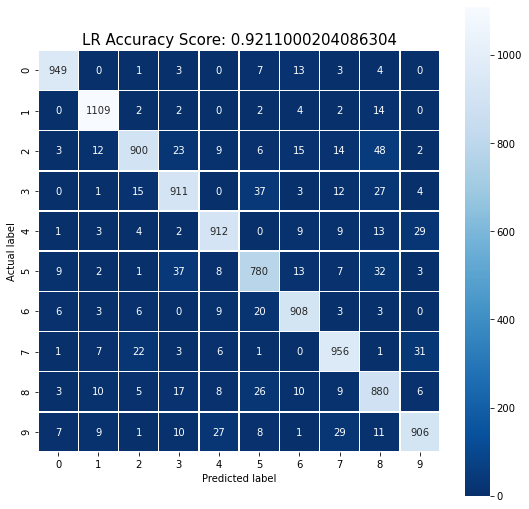

In [46]:
#Confusion Matrix Plot for Logistic Regression Model Testing
plt.figure(figsize=(9,9))
sns.heatmap(cm_B, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LR Accuracy Score: {0}'.format(scoreB)
plt.title(all_sample_title, size = 15);

#### 3. Classification Report for Model B

In [47]:
#Logistic Regression Classification Report for Each Digit
print(classification_report(ytest_B, predictionsB_new, digits = 4))

              precision    recall  f1-score   support

           0     0.9694    0.9684    0.9689       980
           1     0.9593    0.9771    0.9681      1135
           2     0.9404    0.8721    0.9050      1032
           3     0.9038    0.9020    0.9029      1010
           4     0.9316    0.9287    0.9301       982
           5     0.8794    0.8744    0.8769       892
           6     0.9303    0.9478    0.9390       958
           7     0.9157    0.9300    0.9228      1028
           8     0.8519    0.9035    0.8769       974
           9     0.9235    0.8979    0.9106      1009

    accuracy                         0.9211     10000
   macro avg     0.9205    0.9202    0.9201     10000
weighted avg     0.9216    0.9211    0.9211     10000



#### 4. Sample Images of Inaccurate Prediction

In [48]:
# Inspecting Misclassified Images of Logistic Regression Model Testing
indexB = 0
misclassifiedIndexesB = []
for label, predict in zip(ytest_B, predictionsB_new):
    if label != predict: 
        misclassifiedIndexesB.append(indexB)
    indexB +=1

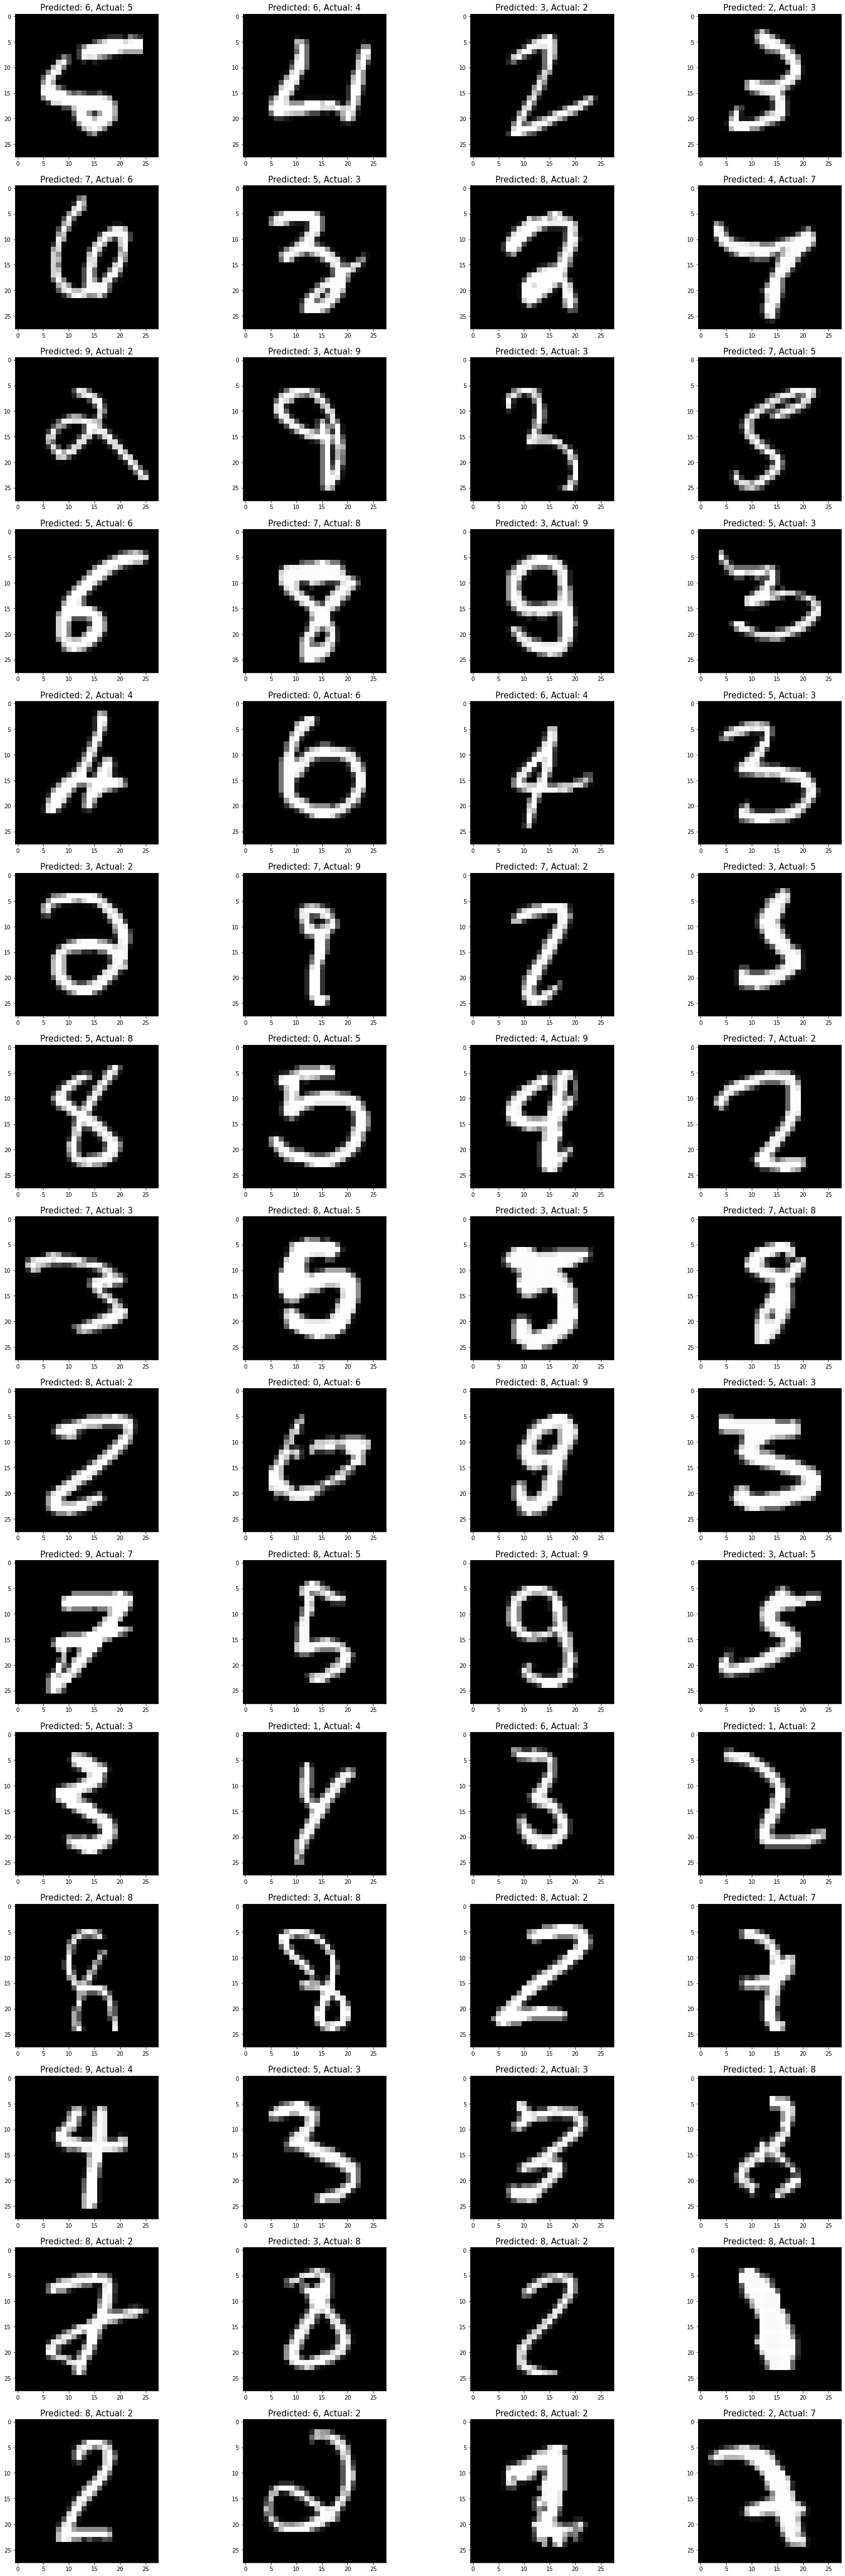

In [49]:
# Show the first 60 Images that are place in the wrong class
plt.figure(figsize=(28,84))
for plotIndex, badIndex in enumerate(misclassifiedIndexesB[0:60]):
    plt.subplot(15, 4, plotIndex + 1)
    plt.imshow(np.reshape(xtest_B[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictionsB_new[badIndex], ytest_B[badIndex]), fontsize = 15)

# Model C: Convolutional Neural Network (TensorFlow)

### Data Pre-Processing
The following are the pre-processing steps taken to prepare the image data before loading them into a CNN Model. The procedures are somewhat different from the data pre-processing for the two models earlier. 

The images will be normalize and later change from a 28x28 to 28x28x1, where the last value indicate the colour channel. In this case, the the channel is 1 for grayscale images.

The results will be updated from a table with one column into 10 binary columns. Each of the column will represent a digit between 0 to 9.

The cleaned training data will then be further spilt into training and validation data set. Next, data augmentation process will be applied onto both training and validation dataset where artificial images are created for training the model later.


#### 1. Normalize the image
In Model A, we had checked and confirmed that the original images contain values between 0 to 255. This we will directly divide by 255 over here and rename the dataset to include '_C'.

In [50]:
#Normalize Data for CNN Model
xtrain_C = xtrain / 255.0
xtest_C = xtest / 255.0

After normalizing the data, we will check the range to confirm they are values between 0 to 1.

In [51]:
# confirm pixel range is 0-1 for train data
print('Train Data Type: %s' % xtrain_C.dtype)
print('Min: %.3f, Max: %.3f' % (xtrain_C.min(), xtrain_C.max()))
# confirm pixel range is 0-1 for test data
print('Test Data Type: %s' % xtest_C.dtype)
print('Min: %.3f, Max: %.3f' % (xtest_C.min(), xtest_C.max()))

Train Data Type: float64
Min: 0.000, Max: 1.000
Test Data Type: float64
Min: 0.000, Max: 1.000


#### 2. Reshape the image

In this section, we will be reshaping the 'x' input vectors to include the channel for the data. We will start by looking at the currect state of the data shape for all.

In [54]:
# Shape of the dataset
print('X Train data size: ', xtrain_C.shape)
print('X Test data size: ', xtest_C.shape)

X Train data size:  (60000, 28, 28)
X Test data size:  (10000, 28, 28)


From above values, we will reshape X from 28x28 to 28x28x1 where the last value equals to the channel for grayscale images.

In [55]:
xtrain_C = xtrain_C.reshape(-1, 28, 28, 1)
xtest_C = xtest_C.reshape(-1, 28, 28, 1)

The following codes will show the updated shapes of the data.

In [56]:
# Shape of the dataset
print('X Train data size: ', xtrain_C.shape)
print('X Test data size: ', xtest_C.shape)

X Train data size:  (60000, 28, 28, 1)
X Test data size:  (10000, 28, 28, 1)


#### 3.  Label the outputs as Categorical Variables

The labels for images in the 'y' input vector are currently in one array with values between 0 to 9. We will use to_categorical() function to convert the 10 classes into ten columns with binary values (either '1' or '0'). 

For examples, the digit 9 will be images will be in column 10 having values equals to 1. All other digits will be labelled as 0 in the 10th column.

In [57]:
#Categorize Labels for CNN Model
ytrain_C = to_categorical(ytrain)
ytest_C = to_categorical(ytest)
print(f"Label size for train data : {ytrain_C.shape}")
print(f"Label size for test data : {ytest_C.shape}")

Label size for train data : (60000, 10)
Label size for test data : (10000, 10)


#### 4. Spilt the data to Train and Validation set

In this section, the training dataset will be spilt into 90% training and 10% validation set.

In [58]:
#Train Test Split for CNN Model
x_train_C, x_valid_C, y_train_C, y_valid_C = train_test_split(xtrain_C, ytrain_C, test_size=0.1, random_state=0)

The following code will show the shape of each set of data after the spilt of training-validation.

In [59]:
x_train_C.shape, x_valid_C.shape, y_train_C.shape, y_valid_C.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (54000, 10), (6000, 10))

#### 5. Data Augmentation on Train and Validation dataset

The data augmentation technique will create artificial training and validation data from the existing dataset. Let's start by defining the required batch size.

In [60]:
# Define batch size for data augmentation
# the same batch size will be used in CNN model later
batch_size = 64

Use the ImageDataGenerator function below to generate multiple batches of the image data.

In [61]:
#Data Augmentation for CNN Model
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

train_gen = datagen.flow(x_train_C, y_train_C, batch_size = batch_size)
valid_gen = datagen.flow(x_valid_C, y_valid_C, batch_size = batch_size)

### Defining CNN Model

In this section, we will start by constructing a convolutional neural network using multiple convolutional layers, pooling layers and a fully connected output layer.

The CNN model begins by placing the 28 x 28 grayscale images into two convolutional layers with the same Rectified Linear Unit (ReLu) activation function. The output shape after the two layers will be a 24 x 24 with 64 feature maps. Then, we will apply max pooling layer where the number of feature maps remains the same and the dimension is halved to 12 x 12. At the end of the max pooling layer, the data will be normalized. In other words, the first part of the models contains two convolutional layers, one max pooling layer and the data is normalized at the end. 

The model repeats with another two convolutional layers, max pooling layer and being normalized again. The only difference of the second part compared to the first part is the number of feature maps is increased to 128 instead of 64. 

At the third part of the model, a convolutional layer with 256 feature maps is applied, then the pooling layer with max operation will be implemented. 

The final part of the CNN model will flatten the output from the last part. The multi-dimensional inputs will be converted into a single dimension. The number of inputs is 1 x 1 x 256 = 256. Then we will apply two activation functions, which are ReLu and SoftMax activation functions. The final output will be compressed to 10 units, which are the 10 classes of the output layer. 

In [62]:
#CNN Model
model = Sequential()
# Part 1
# adding two convolutional layers
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
# add pooling layer with max operator
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
# Part 2
# add convolutional layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
# add pooling layer with max operator
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
# Part 3
# add convolutional layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"))
# add pooling layer    
model.add(MaxPooling2D(pool_size = (2, 2)))
# Part 4
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation = "relu"))
model.add(Dense(10, activation = "softmax"))    
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

### Model Training

With the defined Convolutional Neural Network model above, the next step will be defining the number of epochs and training the model.

In [63]:
#Define epochs for CNN Model
epochs = 50

In [64]:
#CNN Model Training
history = model.fit(train_gen, epochs = epochs, 
                    steps_per_epoch = x_train_C.shape[0] // batch_size,
                    validation_data = valid_gen,
                    validation_steps = x_valid_C.shape[0] // batch_size)

Epoch 1/50
843/843 [==============================] - 168s 198ms/step - loss: 0.1353 - accuracy: 0.9585 - val_loss: 0.1119 - val_accuracy: 0.9688
Epoch 2/50
843/843 [==============================] - 163s 194ms/step - loss: 0.0619 - accuracy: 0.9818 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 3/50
843/843 [==============================] - 168s 200ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0693 - val_accuracy: 0.9803
Epoch 4/50
843/843 [==============================] - 164s 195ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 0.0360 - val_accuracy: 0.9904
Epoch 5/50
843/843 [==============================] - 166s 197ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0492 - val_accuracy: 0.9862
Epoch 6/50
843/843 [==============================] - 160s 190ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0452 - val_accuracy: 0.9877
Epoch 7/50
843/843 [==============================] - 160s 190ms/step - loss: 0.0344 - accuracy: 0.9905 - val_loss: 0.0478 -

### Performance of the Model C
The performance of the model will be check by running the test dataset on the built model. This section will be spilt into four parts:
   - Accuracy Score of Test Dataset
   - Confusion Matrix
   - Classification Report
   - Sample images with inaccurate prediction
   
#### 1. Accuracy of Model C
The test dataset will be used to check the performance of the model.

In [65]:
#CNN Model Testing
loss, scoreC = model.evaluate(xtest_C, ytest_C)

313/313 [==============================] - 11s 34ms/step - loss: 0.0280 - accuracy: 0.9937


In [66]:
# Show the performance of the model
print("Test Accuracy: %.2f" % (scoreC*100))

Test Accuracy: 99.37


#### 2. Confusion Matrix for Model C

In [67]:
#Confusion Matrix For CNN Model Testing Result
ypred_C = model.predict(xtest_C) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
YpredC = np.argmax(ypred_C, 1) # Decode Predicted labels
YtestC = np.argmax(ytest_C, 1) # Decode labels
cm_C = confusion_matrix(YtestC, YpredC) # Confusion matrix

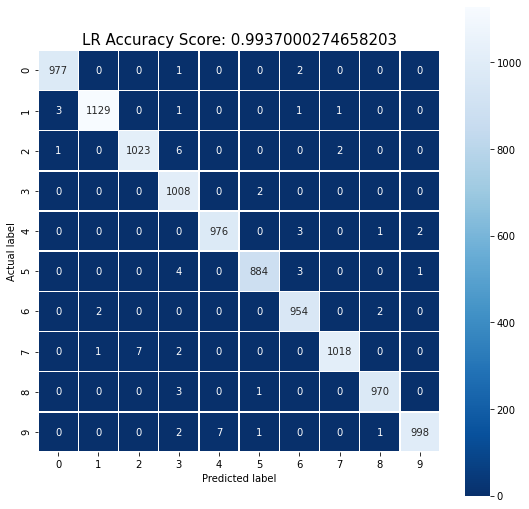

In [68]:
# Plot Confusion matrix
fig = plt.figure(figsize = (9, 9)) # Set Figure
sns.heatmap(cm_C, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LR Accuracy Score: {0}'.format(scoreC)
plt.title(all_sample_title, size = 15);

#### 3. Classification Report for Model C

In [69]:
#CNN Model Classification Report for Each Digit
print(classification_report(YtestC, YpredC, digits = 4))

              precision    recall  f1-score   support

           0     0.9959    0.9969    0.9964       980
           1     0.9973    0.9947    0.9960      1135
           2     0.9932    0.9913    0.9922      1032
           3     0.9815    0.9980    0.9897      1010
           4     0.9929    0.9939    0.9934       982
           5     0.9955    0.9910    0.9933       892
           6     0.9907    0.9958    0.9932       958
           7     0.9971    0.9903    0.9937      1028
           8     0.9959    0.9959    0.9959       974
           9     0.9970    0.9891    0.9930      1009

    accuracy                         0.9937     10000
   macro avg     0.9937    0.9937    0.9937     10000
weighted avg     0.9937    0.9937    0.9937     10000



#### 4. Sample Images of Inaccurate Prediction

In [70]:
# Inspecting Misclassified Images of CNN Model Testing
indexC = 0
misclassifiedIndexesC = []
for label, predict in zip(YtestC, YpredC):
    if label != predict: 
        misclassifiedIndexesC.append(indexC)
    indexC += 1

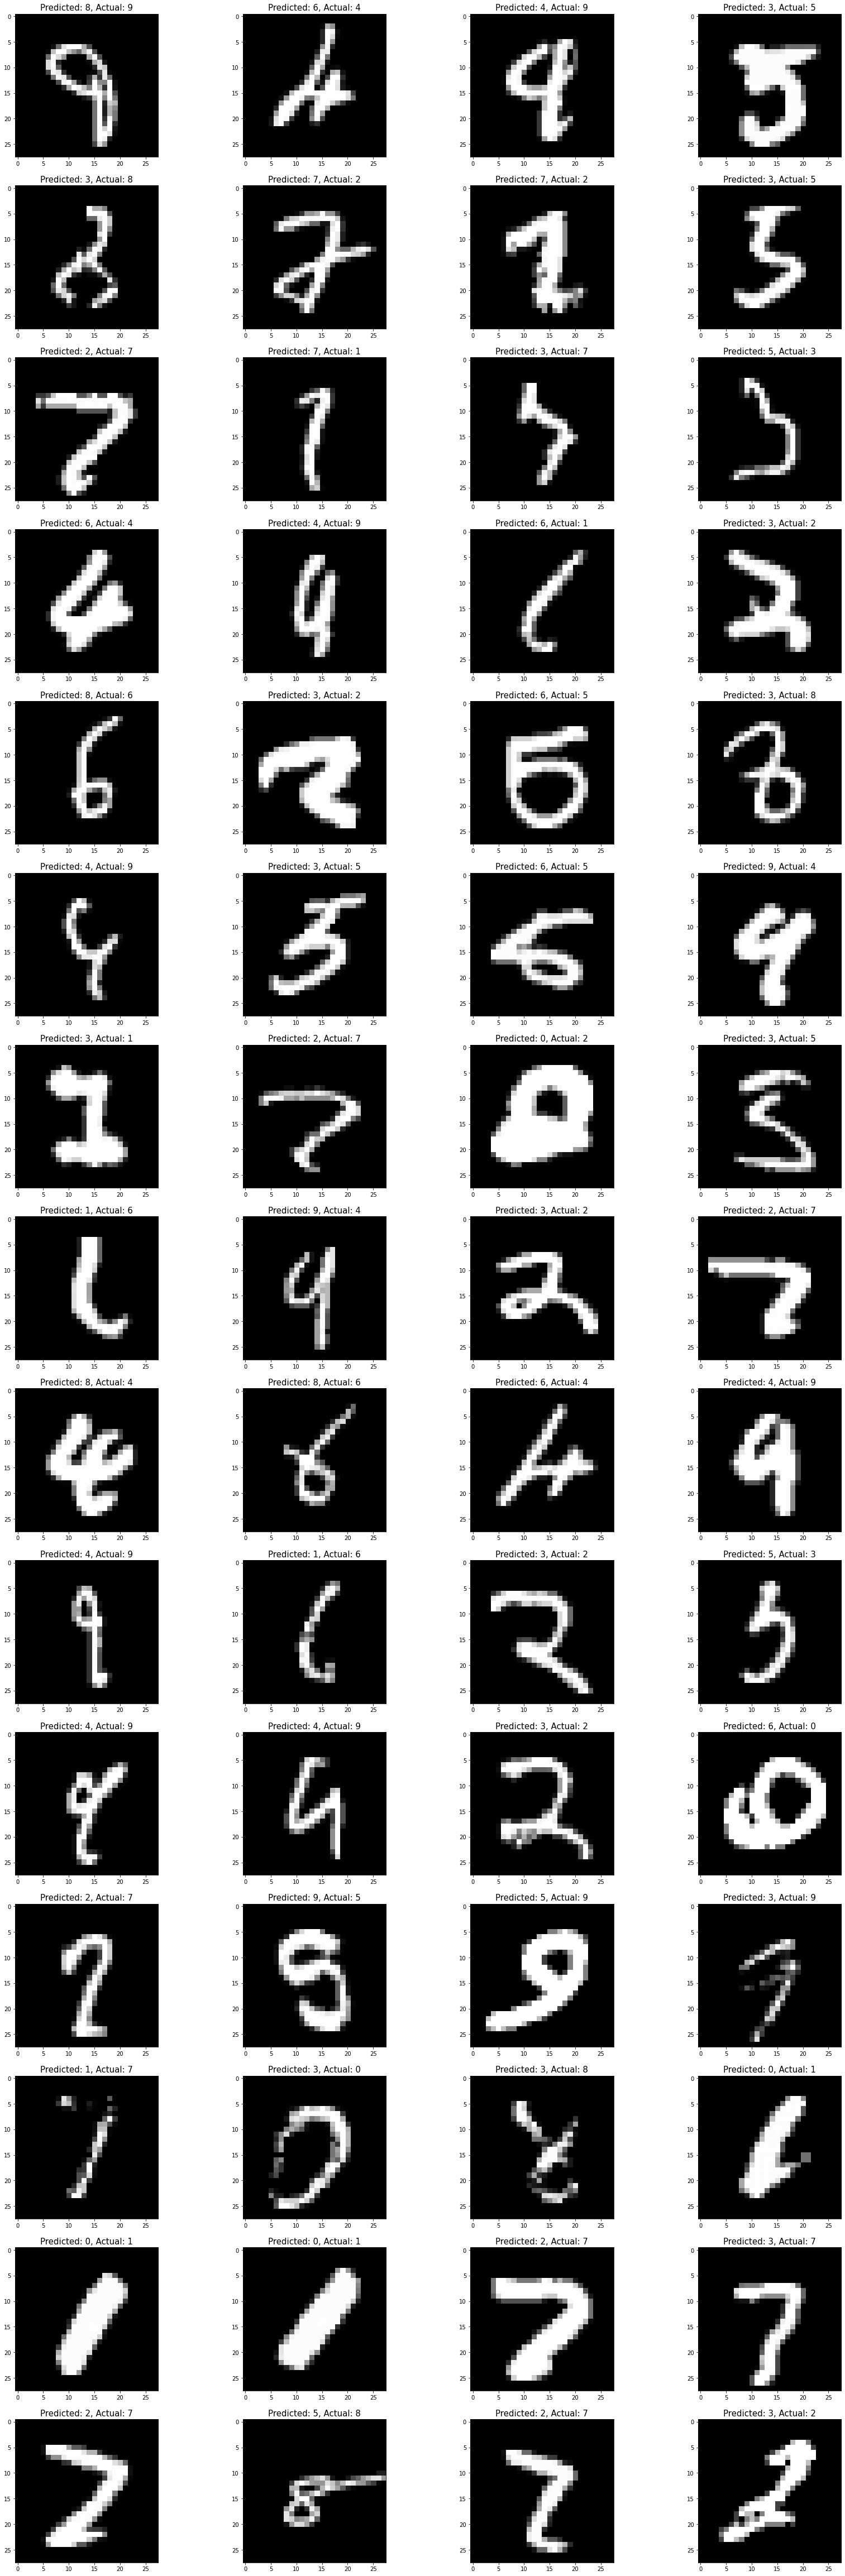

In [71]:
# Plot the test results
plt.figure(figsize = (28, 84))
for plotIndex, badIndex in enumerate(misclassifiedIndexesC[0:60]):
    plt.subplot(15, 4, plotIndex + 1)
    plt.imshow(np.reshape(xtest_C[badIndex], (28, 28)), cmap = plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(YpredC[badIndex], YtestC[badIndex]), fontsize = 15)

# Summarize the Performances
A bar chart showing the performance of all classification model will be created.

In [72]:
# Use a list to store all scores.
allscores = [scoreA, scoreB.numpy(), scoreC]
print(allscores)

[0.9258, 0.9211, 0.9937000274658203]


In [73]:
# Use a list to store all model names
models = ['LR (SkLearn)', 'LR (TF)', 'CNN']

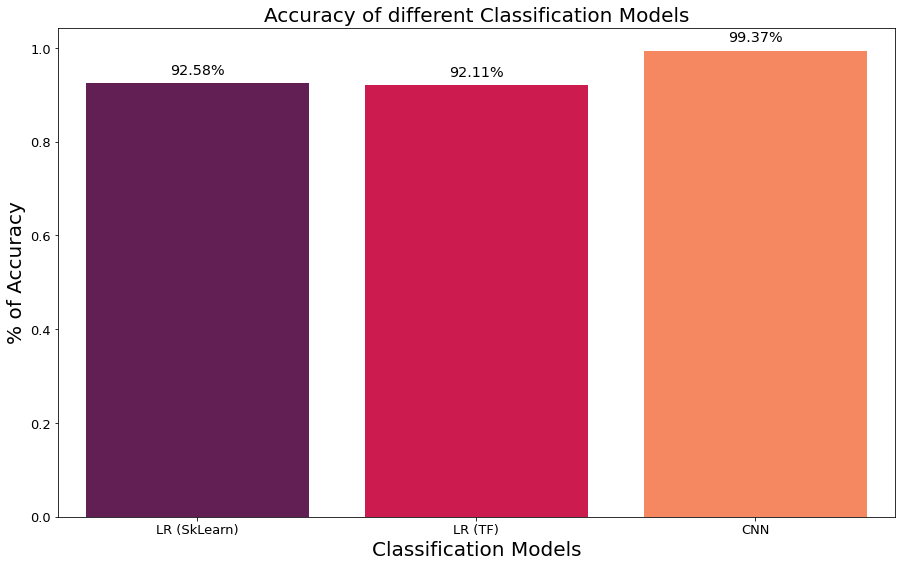

In [74]:
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15, 9
ax = sns.barplot(x=models, y=allscores, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x+ width/2, y+ height*1.02), ha='center', fontsize = 'x-large')
plt.show()